In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Moving average-based prediction models

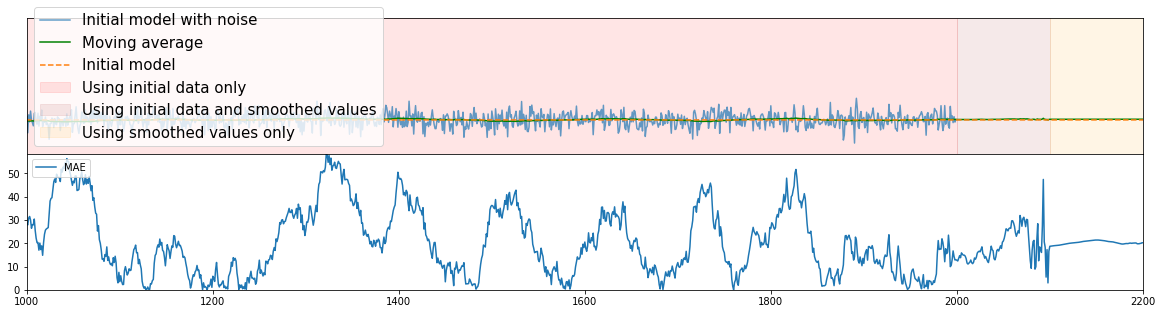

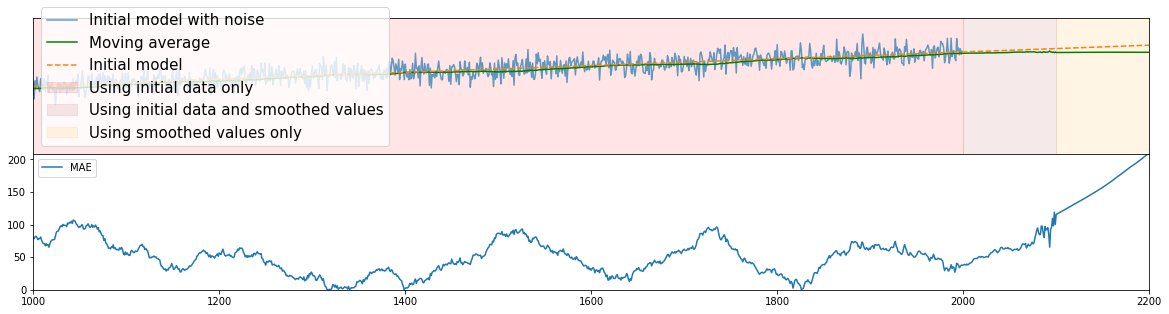

In [33]:
# initialisation

k=2000 # data size
n=100 # 
m=1000 # 
f=np.random.randn(k)*200 # f=const+random_noise
g=np.arange(k)+f # g(x)=x+random_noise
f_noiseless=[0]*(k+m)
g_noiseless=np.arange(k+m)


# moving average function, inputs are: m-prediction distance, n-window width
def rolling_prediction(l, m, n):
    aver=[]
    o=len(l)
    for i in range(int(o+m)):
        if i<n:
            aver.append(np.average(l[:n]))
        elif (i<=o)&(i>=n):
            aver.append(np.average(l[i-n:i]))
        elif (i>o)&(i<o+n):
            aver.append((np.average(l[i-n:])+np.average(aver[o:i]))/2)
        elif i>=o+n:
            aver.append(np.average(aver[i-n:i]))
    return aver

# values calculation

f_mean=rolling_prediction(f, m,n)

g_mean=rolling_prediction(g,m,n)

# squared error calculation
def squared_error(abs, model):
    se=np.abs(pd.Series(abs)-pd.Series(model))
    return se

# visualisation

def plot(f,init_f,f_mean, k,m,n, loc, file_name):
    plt.subplot(2,1,1)
    plt.plot(f, alpha=0.7, label='Initial model with noise')
    plt.plot(f_mean,"g",label='Moving average')
    plt.plot(init_f, '--', label='Initial model')
    plt.axvspan(0,k,color='red', alpha=0.1, label="Using initial data only")
    plt.axvspan(k,k+n,color='brown', alpha=0.1, label="Using initial data and smoothed values")
    plt.axvspan(k+n,k+m,color='orange', alpha=0.1, label="Using smoothed values only")
    fig=plt.gcf()
    fig.set_size_inches(20,5)
    plt.ylim(-k/2,k*1.5)
    plt.yticks([],[])
    plt.xticks([],[])
    plt.xlim(k/2,k+2*n)
    plt.legend(fontsize=15, loc=loc)
    plt.subplot(2,1,2)
    se=squared_error(init_f,f_mean)
    plt.plot(se, label='MAE')
    plt.legend(loc='upper left')
    plt.xlim(k/2,k+2*n)
    plt.ylim(0,np.max(se[int(k/2):int(k+2*n)]))
    #plt.title('Moving average acceptability',fontsize=20)
    plt.savefig('{}.jpg'.format(file_name))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show() 

plot(f,[0]*(m+k),f_mean,k,m,n,'lower left', 'Moving average 1')
plot(g,g_noiseless,g_mean,k,m,n,'lower left','Moving average 2')

## Data preprocessing 
### Data import
- Dst data

In [117]:
try:
    Dst_data=pd.read_csv(r"../texts_pdf_outputs_etc/Dst data/Dst.csv",index_col=[0], names=["Dst_index"], parse_dates=[0], skiprows=[0])
    Dst_data["Dst_index"]=Dst_data["Dst_index"].astype(np.int32)
except OSError:
    Dst_data=pd.DataFrame(columns=['time', 'Dst_index'])
    with open(r"../texts_pdf_outputs_etc/Dst data/Dst.txt") as Dst:
        Dst_text=list(Dst)
        for i,line in enumerate(Dst_text):
            for j in range(24):
                    Dst_data.loc[j+i*24,"time"]=datetime.datetime(int(line[14:16]+line[3:5]), int(line[5:7]), int(line[8:10]),j,0,0)
                    Dst_data.loc[j+i*24,"Dst_index"]=line[21+j*4:24+j*4]
            print("\r{} %".format(round(i/len(Dst_text))*100,2), end="")
        Dst_data.to_csv(r'../texts_pdf_outputs_etc/Dst data/Dst.csv', index=False)

* ACE data

In [38]:
try:
    ACE_data=pd.read_csv(r"../texts_pdf_outputs_etc/ACE data/ACE.csv",index_col=[0], names=["He_velocity","data_quality"], parse_dates=[0], skiprows=[0])
    ACE_data[["He_velocity","data_quality"]]=ACE_data[["He_velocity","data_quality"]].astype(np.float32)
except OSError:
    ACE_data=pd.DataFrame(columns=["time","He_velocity","data_quality"])
    with open(r"../texts_pdf_outputs_etc/ACE data/all_data_not_processed.txt") as file:
        file_series=pd.Series(file.readlines())
    file_series=file_series[file_series!="\n"]
    for j,line_txt in enumerate(file_series):
        line=line_txt.split()
        ACE_data.loc[j,"time"]=datetime.datetime(int(line[0]), (datetime.datetime(int(line[0]),1,1,0,0,0)+datetime.timedelta(int(line[1]))).month,(datetime.datetime(int(line[0]),1,1,0,0,0)+datetime.timedelta(int(line[1]))).day, int(line[2].strip()), 0,0)
        ACE_data.loc[j,"He_velocity"]=float(line[5])
        ACE_data.loc[j, 'data_quality']=int(line[6])
        print("\r{} %".format(round((j/len(file_series))*100,2)), end="")
    ACE_data.to_csv(r"../texts_pdf_outputs_etc/ACE data//ACE.csv", index=False)

* GOES data

In [72]:
GOES_data=pd.DataFrame()
parent_directory="C:\\Users\\222br\\Downloads\\New folder\\"
os.chdir(parent_directory)
for directory in os.listdir():
    print(directory)
    os.chdir(parent_directory+directory)
    for sub_dir in os.listdir():
        print(sub_dir)
        os.chdir(parent_directory+directory+"\\"+sub_dir)
        for sub_sub_dir in os.listdir():
                os.chdir(parent_directory+directory+"\\"+sub_dir+"\\"+sub_sub_dir+"\\"+"csv")
                if "eps" in os.listdir()[0]:
                    GOES_data=pd.read_excel(os.listdir()[0],)

1998
01
02
03
04
05
06
07
08
09
10
11
12
1999
01
02
03
04
05
06
07
08
09
10
11
12
2000
01
02
03
04
05
06
07
08
09
10
11
12
2001
01
02
03
04
05
06
07
08
09
10
11
12
2002
01
02
03
04
05
06
07
08
09
10
11
12
2003
01
02
03
04
05
06
07
08
09
10
11
12
2004
01
02
03
04
05
06
07
08
09
10
11
12
2005
01
02
03
04
05
06
07
08
09
10
11
12
2006
01
02
03
04
05
06
07
08
09
10
11
12
2007
01
02
03
04
05
06
07
08
09
10
11
12
2008
01
02
03
04
05
06
07
08
09
10
11
12
2009
01
02
03
04
05
06
07
08
09
10
11
12
2010
01
02
03
04
05
06
07
08
09
10
11
12
2011
01
02
03
04
05
06
07
08
09
10
11
12
2012
01
02
03
04
05
06
07
08
09
10
11
12
2013
01
02
03
04
05
06
07
08
09
10
11
12
2014
01
02
03
04
05
06
07
08
09
10
11
12
2015
01
02
03
04
05
06
07
08
09
10
11
12
2016
01
02
03
04
05
06
07
08
09
10
11
12
2017
01
02
03
04
05
06
07
08
09
10
11
12
2018
01
02
03
04
05
06
07
08
